In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

#Read excel dataset
df = pd.read_excel('timeseries_covid19_us_confirmed.xlsx',index_col='date',parse_dates=True)

#since US is irrelevant in this dataframe
df = df.drop(columns=['country'])
df.head()

,total
date,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5


In [2]:
df.tail()

,total
date,
2020-11-14,10903890
2020-11-15,11036935
2020-11-16,11195388
2020-11-17,11357322
2020-11-18,11527483


In [3]:
train_data = df.iloc[:242] # Goes up to but not including 242
#train_data = train_data.astype('double')
test_data = df.iloc[242:]
#test_data = test_data.astype('double')
test_data.index

DatetimeIndex(['2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25', '2020-09-26', '2020-09-27',
               '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05',
               '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09',
               '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13',
               '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17',
               '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02',
               '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06',
               '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-14',
      

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

fitted_model = ExponentialSmoothing(train_data['total'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

In [7]:
test_predictions = fitted_model.forecast(60).rename('Case Forecast')
test_predictions

2020-09-20   6792599.98
2020-09-21   6823433.77
2020-09-22   6859234.19
2020-09-23   6897742.27
2020-09-24   6942690.15
2020-09-25   6994527.90
2020-09-26   7044113.55
2020-09-27   7079736.42
2020-09-28   7111873.61
2020-09-29   7149187.39
2020-09-30   7189323.28
2020-10-01   7236171.19
2020-10-02   7290200.22
2020-10-03   7341881.95
2020-10-04   7379010.67
2020-10-05   7412506.36
2020-10-06   7451397.46
2020-10-07   7493229.98
2020-10-08   7542058.24
2020-10-09   7598371.19
2020-10-10   7652237.61
2020-10-11   7690935.83
2020-10-12   7725847.44
2020-10-13   7766382.55
2020-10-14   7809983.41
2020-10-15   7860875.74
2020-10-16   7919569.14
2020-10-17   7975712.60
2020-10-18   8016046.67
2020-10-19   8052434.06
2020-10-20   8094682.67
2020-10-21   8140126.62
2020-10-22   8193170.27
2020-10-23   8254344.76
2020-10-24   8312861.51
2020-10-25   8354900.57
2020-10-26   8392826.14
2020-10-27   8436860.68
2020-10-28   8484225.63
2020-10-29   8539511.54
2020-10-30   8603271.99
2020-10-31   866

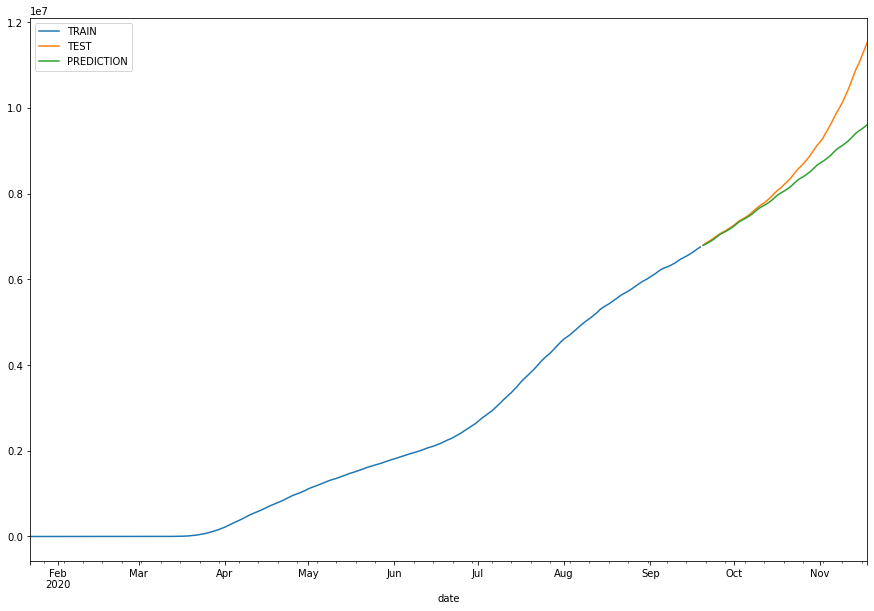

In [8]:
train_data['total'].plot(legend=True,label='TRAIN')
test_data['total'].plot(legend=True,label='TEST',figsize=(15,10))
test_predictions.plot(legend=True,label='PREDICTION');

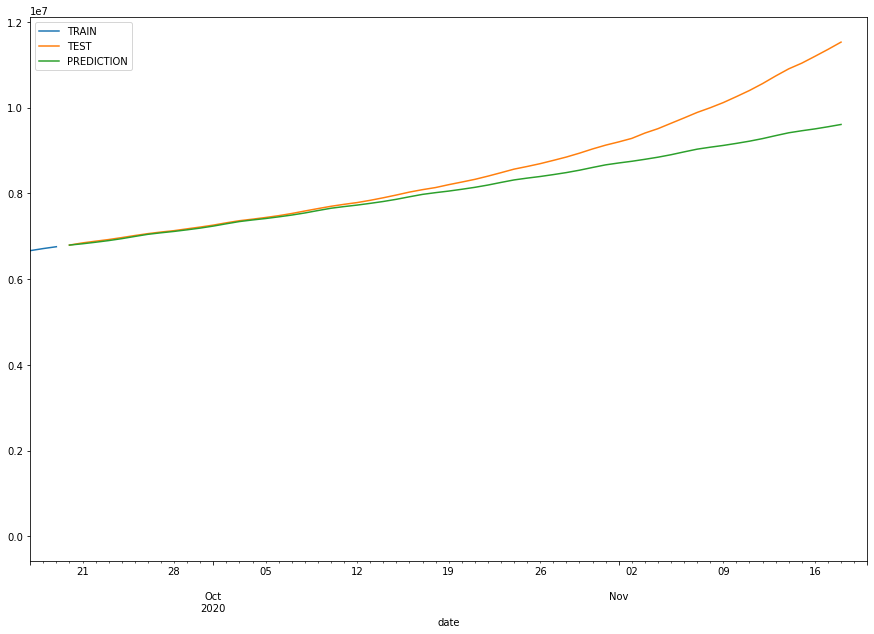

In [9]:
train_data['total'].plot(legend=True,label='TRAIN')
test_data['total'].plot(legend=True,label='TEST',figsize=(15,10))
#let's zoom into the period we were predicting for
test_predictions.plot(legend=True,label='PREDICTION',xlim=['9/17/2020','11/20/2020']);

In [10]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [12]:
mean_absolute_error(test_data,test_predictions)

416912.65773325687

In [14]:
mean_squared_error(test_data,test_predictions)

451241030828.88965

In [16]:
np.sqrt(mean_squared_error(test_data,test_predictions))

671744.7661343478

In [18]:
test_data.describe() #we want to compare MSE with Avergae of Test Data, or RMSE with STD of overall True Data

,total
count,60.00
mean,8538448.17
std,1332108.82
min,6792454.00
25%,7426597.75
50%,8232494.00
75%,9431263.25
max,11527483.00


## Forecasting into Future

In [19]:
final_model = ExponentialSmoothing(df['total'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

In [21]:
forecast_predictions = final_model.forecast(43)#forecast to December 31,2020
forecast_predictions

2020-11-19   11714725.90
2020-11-20   11905480.82
2020-11-21   12083389.11
2020-11-22   12230237.42
2020-11-23   12399905.68
2020-11-24   12583441.87
2020-11-25   12775773.95
2020-11-26   12979665.49
2020-11-27   13191017.86
2020-11-28   13388136.44
2020-11-29   13550841.22
2020-11-30   13738830.03
2020-12-01   13942184.19
2020-12-02   14155284.02
2020-12-03   14381191.48
2020-12-04   14615365.38
2020-12-05   14833768.54
2020-12-06   15014041.96
2020-12-07   15222329.53
2020-12-08   15447641.60
2020-12-09   15683751.64
2020-12-10   15934052.27
2020-12-11   16193511.94
2020-12-12   16435497.96
2020-12-13   16635237.06
2020-12-14   16866015.22
2020-12-15   17115656.17
2020-12-16   17377261.04
2020-12-17   17654588.78
2020-12-18   17942064.54
2020-12-19   18210179.87
2020-12-20   18431486.51
2020-12-21   18687183.78
2020-12-22   18963780.60
2020-12-23   19253633.19
2020-12-24   19560906.40
2020-12-25   19879423.38
2020-12-26   20176489.43
2020-12-27   20421692.45
2020-12-28   20704999.55


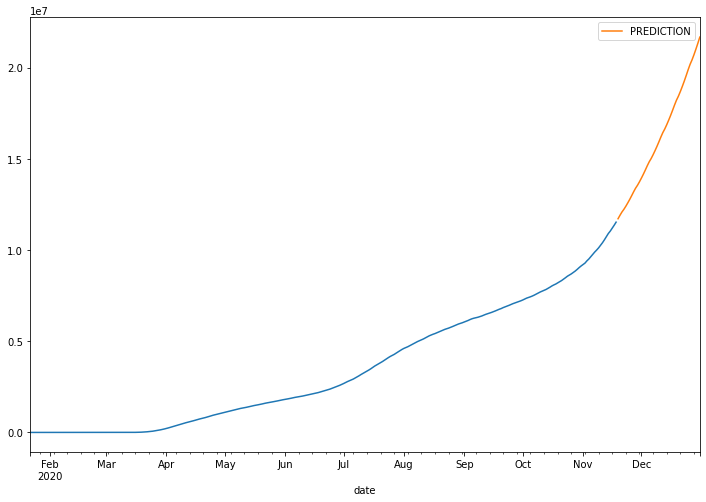

In [26]:
df['total'].plot(figsize=(12,8))
forecast_predictions.plot(legend=True,label='PREDICTION');